In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer =  pd.read_csv('E:/Python/Case Study 1 - Retail Case Study/Customer.csv')
category =  pd.read_csv('E:/Python/Case Study 1 - Retail Case Study/prod_cat_info.csv')
transaction =  pd.read_csv('E:/Python/Case Study 1 - Retail Case Study/Transactions.csv')

In [3]:
category.rename(columns={"prod_sub_cat_code":"prod_subcat_code"},inplace=True)

In [4]:
transaction.rename(columns={'cust_id': 'customer_Id'}, inplace=True)

### 1.Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly

In [5]:
prod_concat = pd.merge(left=transaction, right=category,on=["prod_cat_code","prod_subcat_code"],how="left")
Customer_Final = pd.merge(left=prod_concat, right=customer,on="customer_Id", how="left")

### 2. Prepare a summary report for the merged data set

##### a. Get the column names and their corresponding data types

In [6]:
sum_dtypes = Customer_Final.dtypes

sum_dtypes

transaction_id        int64
customer_Id           int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
DOB                  object
Gender               object
city_code           float64
dtype: object

#### b. Top/Bottom 10 observations

In [7]:
top_10 = Customer_Final.head(10)
bottom_10 = Customer_Final.tail(10)

top_10

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,27-07-1992,M,8.0
5,97439039119,272357,23-02-2014,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances,09-10-1982,F,6.0
6,45649838090,273667,22-02-2014,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath,29-05-1981,M,9.0
7,22643667930,271489,22-02-2014,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools,21-04-1971,M,9.0
8,79792372943,275108,22-02-2014,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,Kids,04-11-1971,F,8.0
9,50076728598,269014,21-02-2014,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,Personal Appliances,27-11-1979,F,3.0


####  c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)


In [8]:
Customer_Final.describe(percentiles=[.25, .5, .75]).T


,count,mean,std,min,25%,50%,75%,max
transaction_id,23053.0,5.007348e+10,2.898194e+10,3268991.000,2.493864e+10,5.009313e+10,7.533000e+10,9.998755e+10
customer_Id,23053.0,2.710217e+05,2.431692e+03,266783.000,2.689350e+05,2.709800e+05,2.731140e+05,2.752650e+05
prod_subcat_code,23053.0,6.149091e+00,3.726372e+00,1.000,3.000000e+00,5.000000e+00,1.000000e+01,1.200000e+01
prod_cat_code,23053.0,3.763632e+00,1.677016e+00,1.000,2.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Qty,23053.0,2.432395e+00,2.268406e+00,-5.000,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
Rate,23053.0,6.363697e+02,6.223635e+02,-1499.000,3.120000e+02,7.100000e+02,1.109000e+03,1.500000e+03
Tax,23053.0,2.486672e+02,1.871778e+02,7.350,9.828000e+01,1.990800e+02,3.657150e+02,7.875000e+02
total_amt,23053.0,2.107308e+03,2.507561e+03,-8270.925,7.624500e+02,1.754740e+03,3.569150e+03,8.287500e+03
city_code,23045.0,5.482534e+00,2.863499e+00,1.000,3.000000e+00,5.000000e+00,8.000000e+00,1.000000e+01


#### d. Frequency tables for all the categorical variables

In [9]:
for columns in Customer_Final.select_dtypes(include='object').columns:
    frequency_table = Customer_Final[columns].value_counts()
    print(f"\nFrequency Table for {columns}:\n{frequency_table}")
    



Frequency Table for tran_date:
13-07-2011    35
21-12-2013    33
23-10-2011    33
22-11-2011    33
25-09-2011    33
              ..
23-02-2014     2
24-02-2014     2
27-02-2014     1
21-02-2014     1
28-02-2014     1
Name: tran_date, Length: 1129, dtype: int64

Frequency Table for Store_type:
e-Shop            9311
MBR               4661
Flagship store    4577
TeleShop          4504
Name: Store_type, dtype: int64

Frequency Table for prod_cat:
Books               6069
Electronics         4898
Home and kitchen    4129
Footwear            2999
Clothing            2960
Bags                1998
Name: prod_cat, dtype: int64

Frequency Table for prod_subcat:
Women                  3048
Mens                   2912
Kids                   1997
Tools                  1062
Fiction                1043
Kitchen                1037
Children               1035
Mobiles                1031
Comics                 1031
Bath                   1023
Furnishing             1007
Non-Fiction            1004
D

#### 3. Generate histograms for all continuous variables and frequency bars for categorical variable

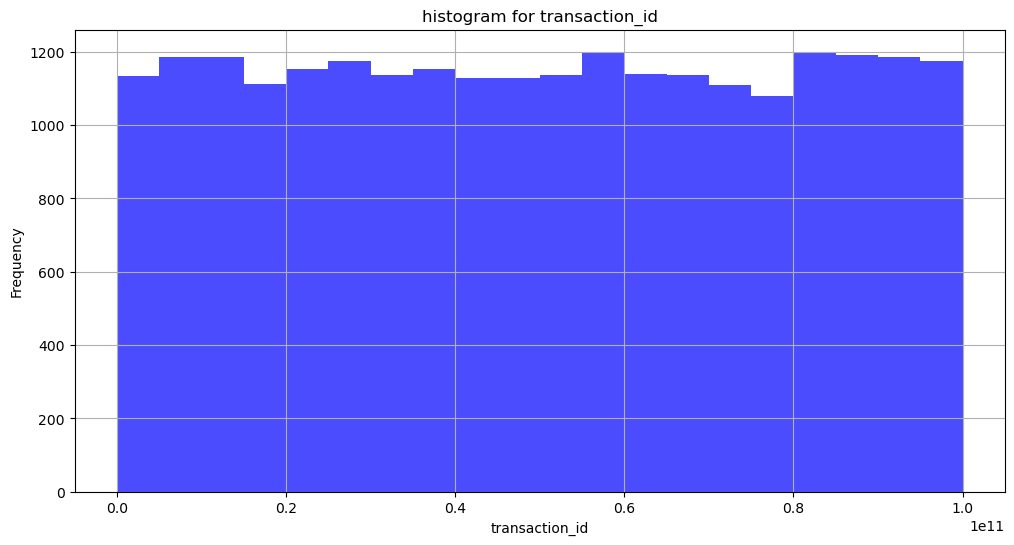

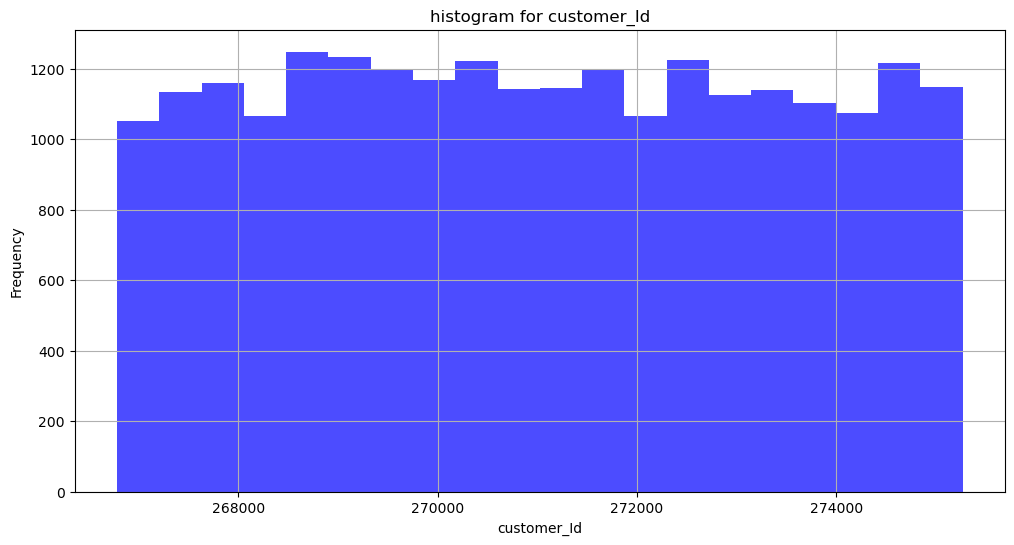

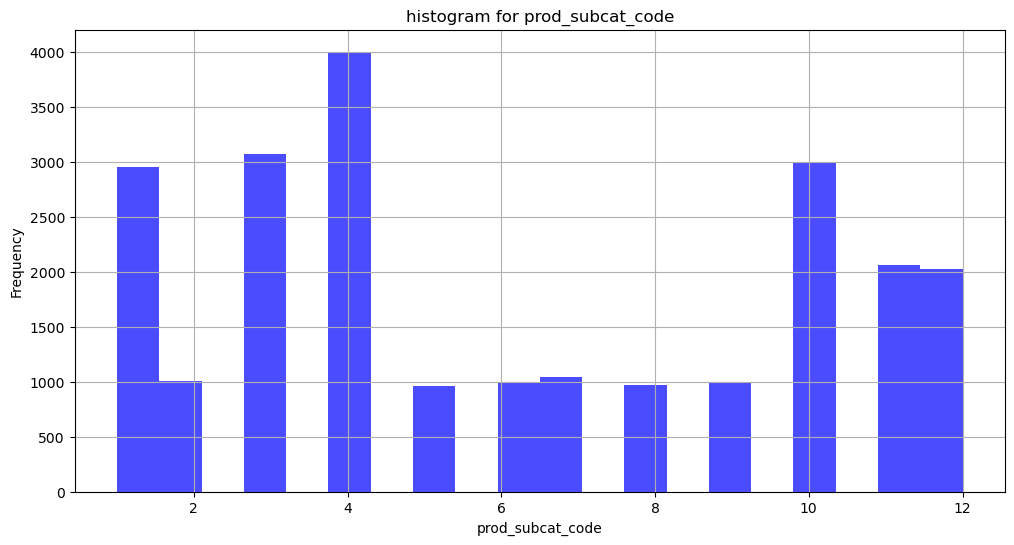

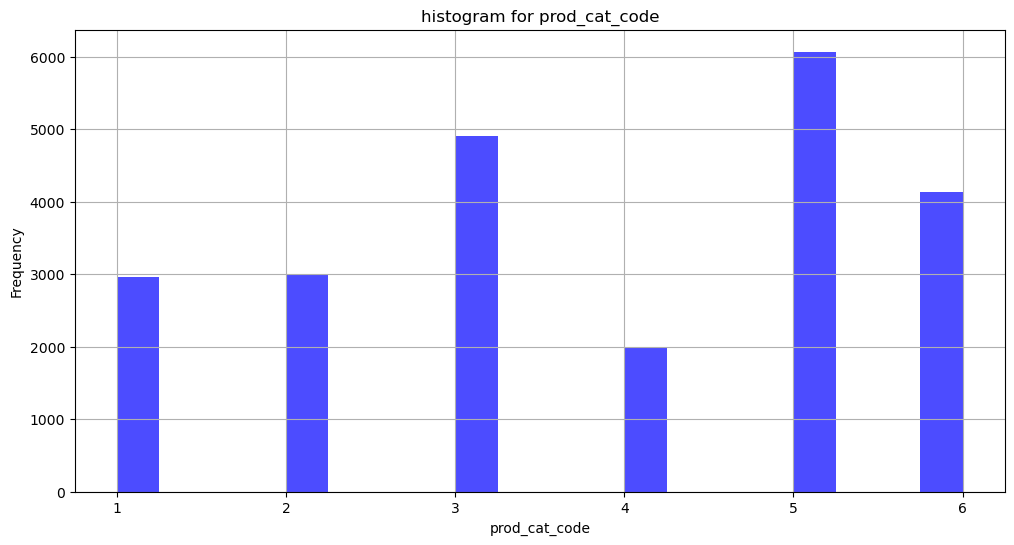

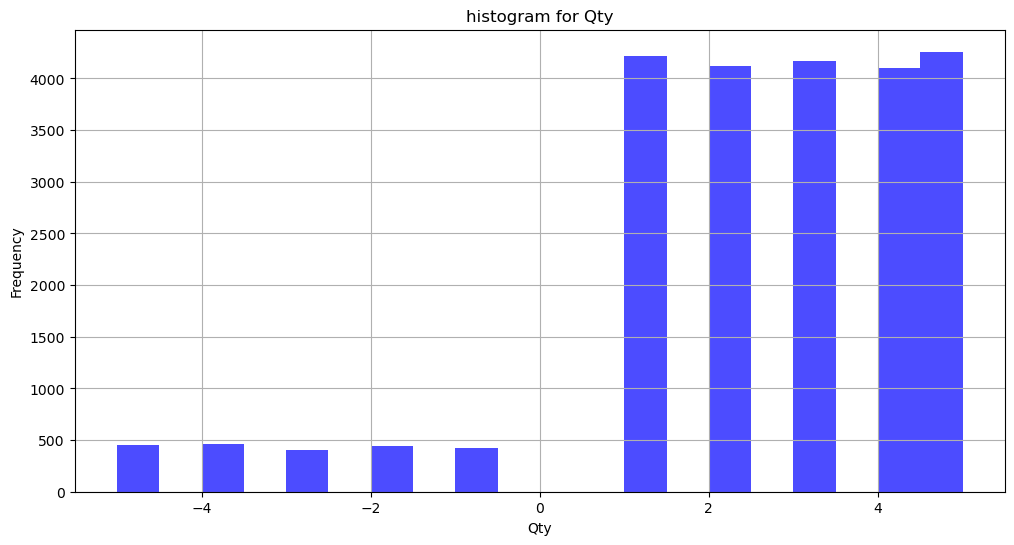

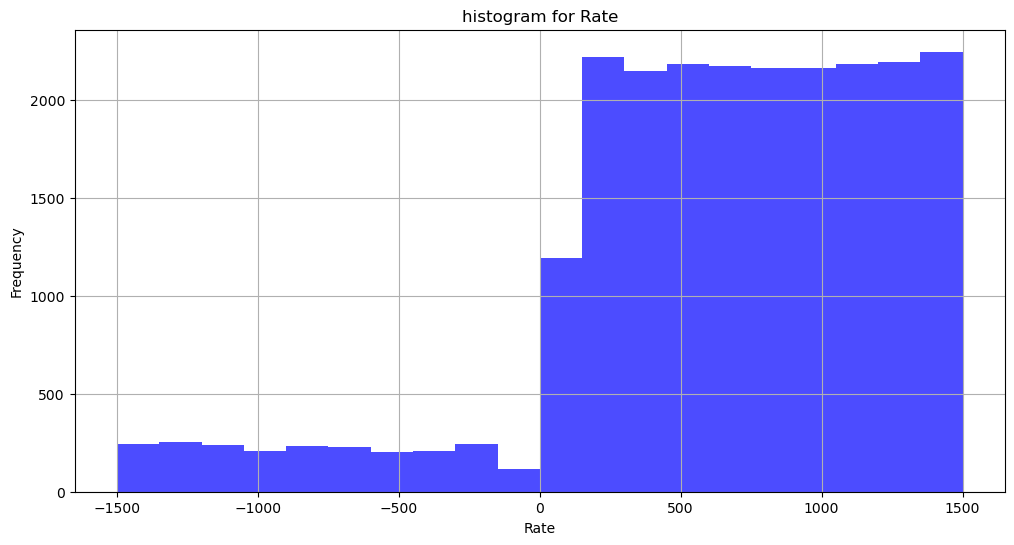

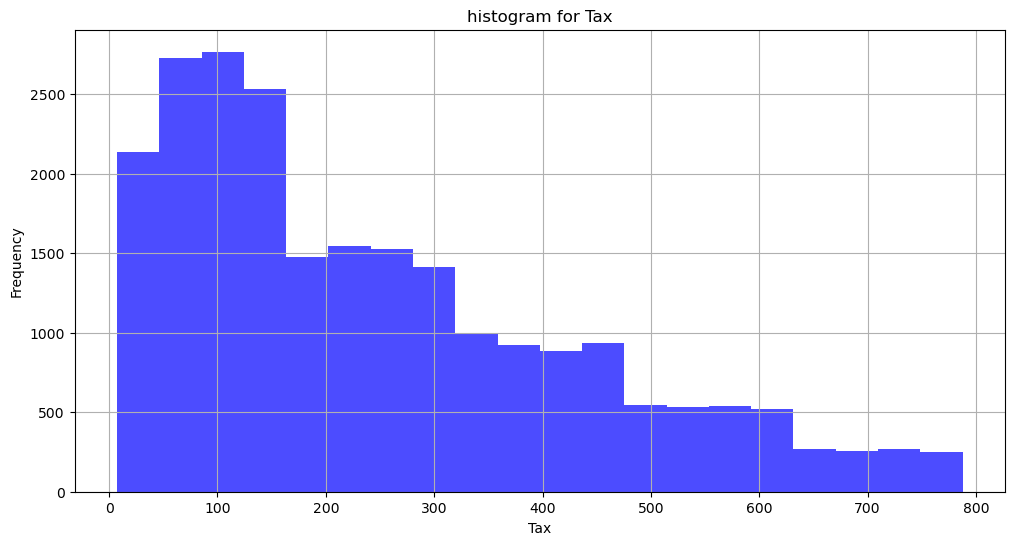

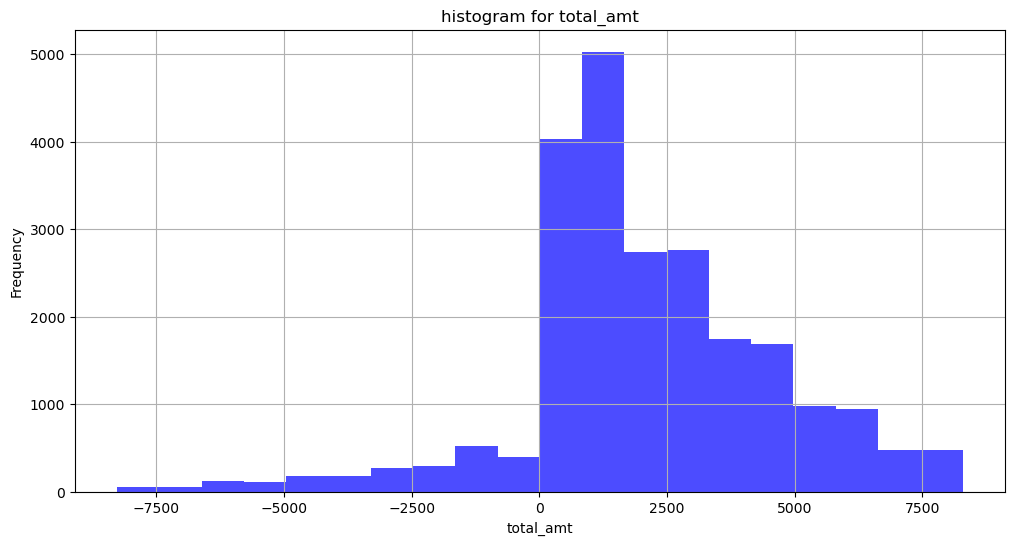

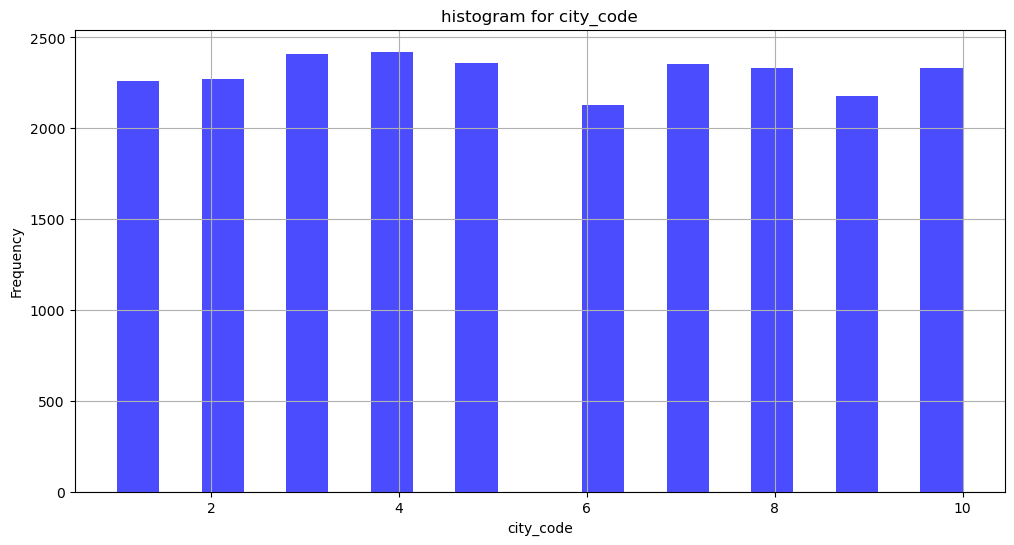

In [10]:
for column in Customer_Final.select_dtypes(include='number').columns:
    plt.figure(figsize=(12,6))
    plt.hist(Customer_Final[column],bins= 20,color='blue',alpha=0.7)
    plt.title(f'histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

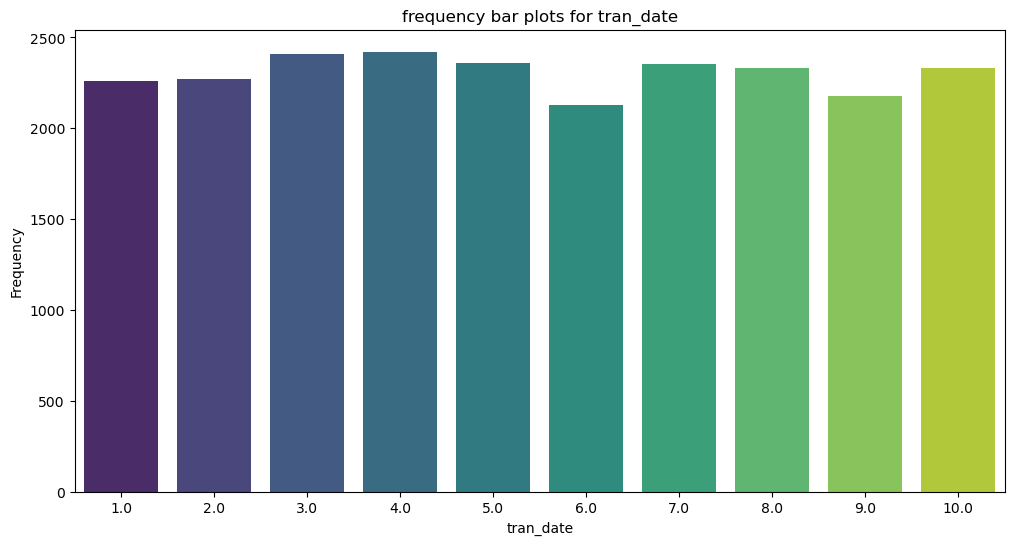

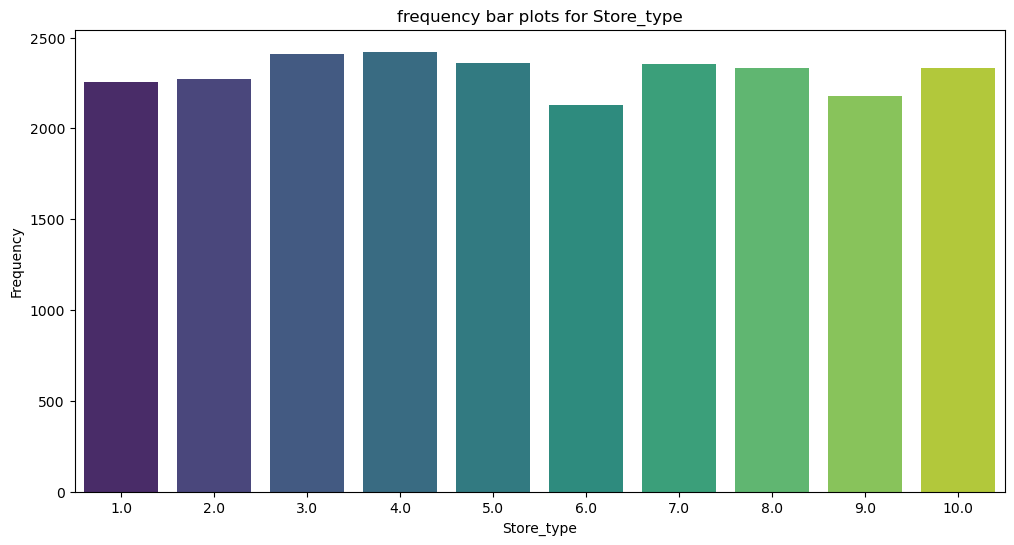

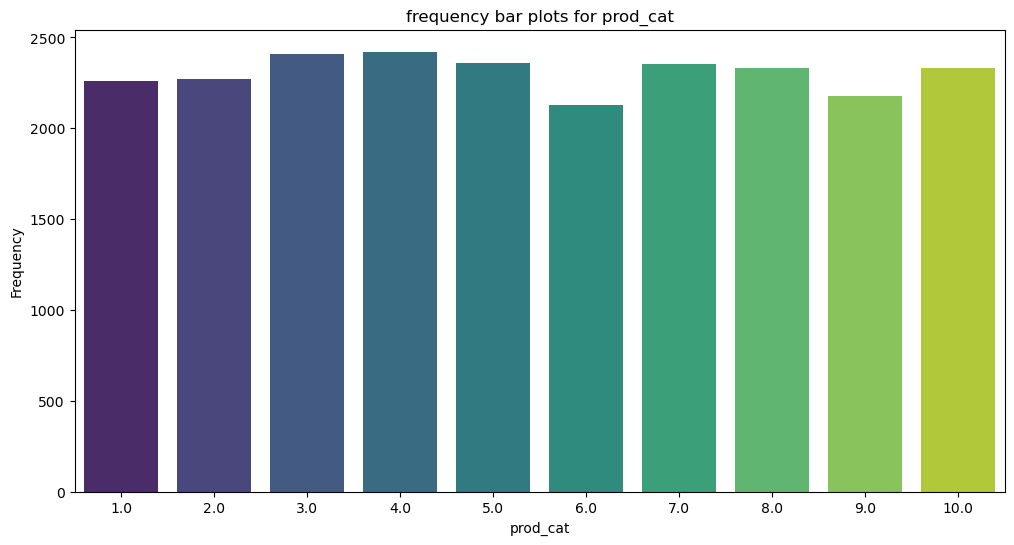

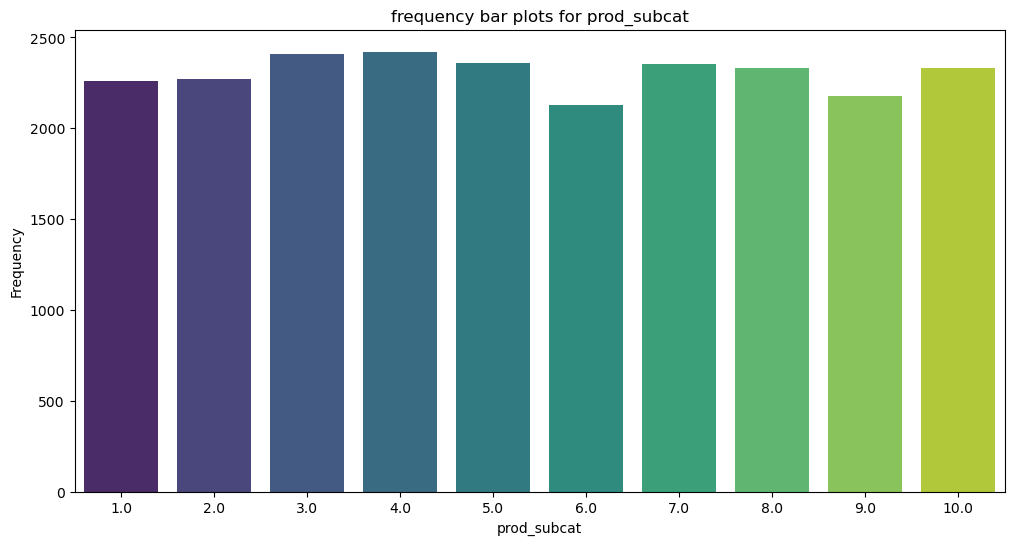

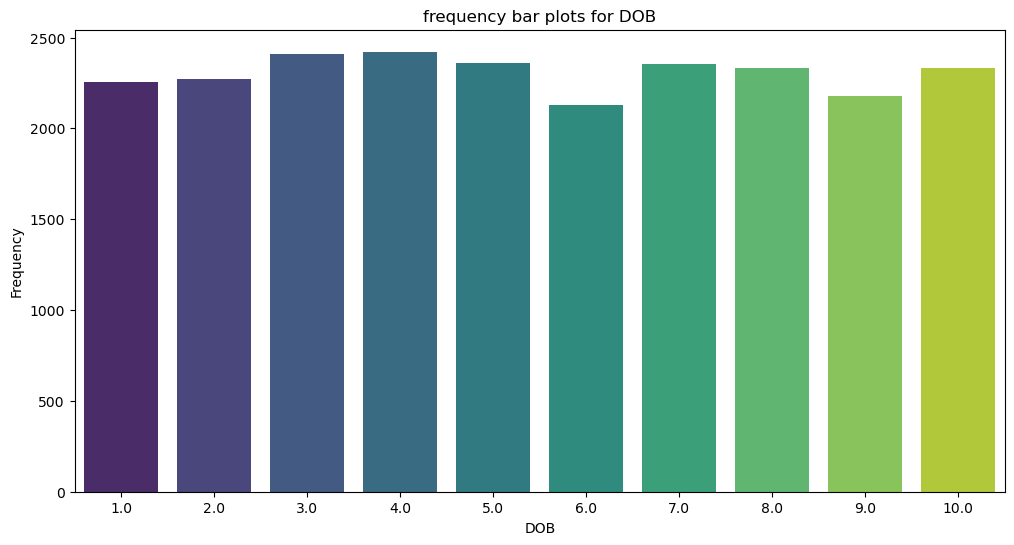

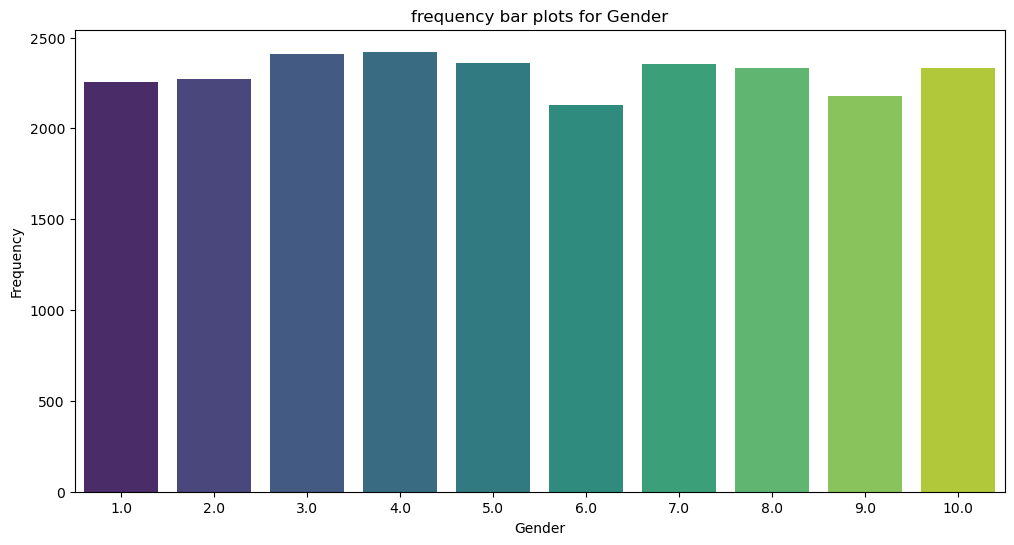

In [11]:
##  frequency bar plots for categorical variables

for columns in Customer_Final.select_dtypes(include='object').columns:
    plt.figure(figsize=(12,6))
    sns.countplot(x=column,data = Customer_Final,palette='viridis')
    plt.title(f'frequency bar plots for {columns}')
    plt.xlabel(columns)
    plt.ylabel('Frequency')
    plt.show()

#### 4. Calculate the following information using the merged dataset :

In [12]:
# a. Time period of the available transaction data



In [13]:
Customer_Final['tran_date']= pd.to_datetime(Customer_Final['tran_date'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12436\4186029441.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  Customer_Final['tran_date']= pd.to_datetime(Customer_Final['tran_date'])


In [14]:
time_period = Customer_Final['tran_date'].max() - Customer_Final['tran_date'].min()

In [15]:
time_period

Timedelta('1430 days 00:00:00')

#### b. Count of transactions where the total amount of transaction was negative

In [16]:
count_neg_tran = Customer_Final[Customer_Final['total_amt']<0].shape[0]

print(f'count of negative of transaction: {count_neg_tran}')

count of negative of transaction: 2177


In [17]:
##2nd method

neg_tran = (Customer_Final['total_amt']<0).sum()

print(f'the no. of negative transaction {neg_tran}')

the no. of negative transaction 2177


#### 5. Analyze which product categories are more popular among females vs male customers.

In [18]:
Customer_Final

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,26-09-1981,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,11-05-1973,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,27-07-1992,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,08-06-1981,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,27-07-1992,M,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,21-02-1972,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,27-04-1984,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,20-06-1976,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,22-05-1970,M,2.0


In [38]:
popular = Customer_Final.groupby(by=['Gender','prod_cat'])

popular

In [37]:
pivot_table = pd.pivot_table(Customer_Final, values='customer_Id', index='prod_cat', columns='Gender', aggfunc='count', fill_value=0)
pivot_table


Gender,F,M
prod_cat,,
Bags,994,1004
Books,2949,3116
Clothing,1439,1518
Electronics,2328,2570
Footwear,1529,1469
Home and kitchen,1994,2134


#### 6. Which City code has the maximum customers and what was the percentage of customers from that city?



In [36]:
city = Customer_Final.groupby(by='city_code').agg({'customer_Id':'count'})
sorted_city = city.sort_values(by='customer_Id', ascending=False)
max_customers_city =sorted_city.head(1)
max_customers_city.columns = ['Population']

max_customers_city.reset_index()





,city_code,Population
0,4.0,2422


In [22]:
city_total_customer = Customer_Final.groupby(by='city_code').agg({'customer_Id':'count'}).sum()
percentage = (sorted_city.head(1)/city_total_customer)*100
percentage.columns=['percentage of total population']

print(percentage)

           percentage of total population
city_code                                
4.0                             10.509872


#### 7. Which store type sells the maximum products by value and by quantity?

In [23]:
maximum_sell = Customer_Final.groupby(by='Store_type').agg({'total_amt':'sum','Qty':'count'}).round(2)
maximum_sell.sort_values(by=['total_amt', 'Qty'], ascending=False, inplace=True)

maximum_sell.reset_index()

,Store_type,total_amt,Qty
0,e-Shop,19824816.05,9311
1,Flagship store,9715688.19,4577
2,MBR,9674486.06,4661
3,TeleShop,9364781.07,4504


In [24]:
## 2nd method (using pivot table)

pivot_result = pd.pivot_table(Customer_Final, values=['total_amt', 'Qty'],index='Store_type', aggfunc={'total_amt':'sum', 'Qty':'count'})
pivot_result = pivot_result.sort_values(by=['total_amt','Qty'],ascending=False,inplace= True)


pivot_result

In [25]:
Customer_Final.tail(100)

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
22953,70163958026,267902,2011-01-30,10,5,4,404,169.680,1785.680,e-Shop,Books,Non-Fiction,17-07-1975,M,4.0
22954,98073908879,270778,2011-01-30,3,5,2,988,207.480,2183.480,MBR,Books,Comics,18-01-1985,F,8.0
22955,83834412428,268669,2011-01-30,11,6,3,651,205.065,2158.065,e-Shop,Home and kitchen,Bath,07-08-1988,F,6.0
22956,89918436046,268647,2011-01-30,3,5,3,428,134.820,1418.820,e-Shop,Books,Comics,07-06-1972,M,9.0
22957,97438152984,274839,2011-01-30,9,3,5,493,258.825,2723.825,e-Shop,Electronics,Cameras,19-03-1971,F,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,21-02-1972,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,27-04-1984,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,20-06-1976,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,22-05-1970,M,2.0


In [26]:
Customer_Final.to_excel(r'E:\Python\output_file.xlsx', index=False)



#### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?


In [27]:
filtered_data = Customer_Final[(Customer_Final['prod_cat'].isin(['Electronics','Clothing'])) & 
                                             (Customer_Final['Store_type']=='Flagship store')]

total_amt = filtered_data.groupby(by ='prod_cat').agg({'total_amt':'sum'}).reset_index()

total_amt

,prod_cat,total_amt
0,Clothing,1194423.23
1,Electronics,2215136.04


#### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [28]:
filtered_data_1 = Customer_Final[(Customer_Final['Gender']=='M') & 
                                             (Customer_Final['prod_cat']=='Electronics')]

total_amt = filtered_data_1['total_amt'].sum()
total_amt

5703109.424999999

#### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?


In [29]:
filtered_data_2 = Customer_Final[Customer_Final['total_amt']>10]

transaction_count = filtered_data_2.groupby('customer_Id')['transaction_id'].nunique()
customers_more_than_10_transactions = transaction_count[transaction_count > 10]

result = len(customers_more_than_10_transactions)
result

6

#### 11. For all customers aged between 25 - 35, find out:  
a. What was the total amount spent for “Electronics” and “Books” product categories?
          
          
b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

#### a. What was the total amount spent for “Electronics” and “Books” product categories?
import datetime as dt
df = Customer_Final.copy()

In [39]:
import datetime as dt
df = Customer_Final.copy()

df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce') 
df['age'] = pd.Timestamp.now().year - df['DOB'].dt.year

filtered_3  = df[(df['age'].between(25,35)) & df['prod_cat'].isin(['Electronics','Books'])]
total_amt_spent =  filtered_3['total_amt'].sum()

print(total_amt_spent)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12436\3149265710.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')


4939932.335


#### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [31]:


df['tran_date'] = pd.to_datetime(df['tran_date'])

start_date = '2014-01-01'
end_date = '2014-03-01'
filtered_date = df[df['tran_date'].between(start_date,end_date)]
amt_spent =  filtered_date['total_amt'].sum()

amt_spent

1409397.665